# Pre-requestions

`matplotlib`的`basemap`很坑，会遇到各种报错,总之这里给出通用安装方法
步骤:  
    1. `conda`创建`python3.6`的环境，然后再`conda install basemap`  
    2. 然后将`matplotlib`降级至`3.2`,命令`pip install -U matplotlib==3.2`

(这里我已经搞好了，用`conda`的`python3-6`环境即可)

In [5]:
import pandas as pd
data = pd.read_csv("./TweetSurfData.csv",sep=";")
data.head()
pd.factorize(data['homecontinent'])[0]

array([ 0, -1, -1, ...,  0,  0,  0])

/home/zarkli/anaconda3/envs/python3-6/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


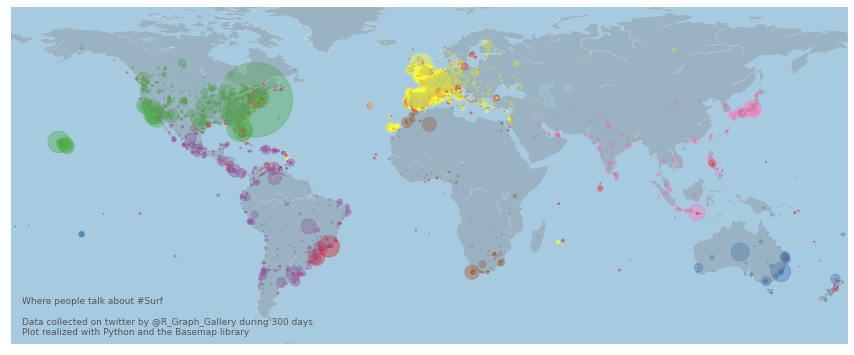

In [4]:
# Basemap library
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
 
# Set the dimension of the figure
plt.rcParams["figure.figsize"]=15,10;


# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# prepare a color for each point depending on the continent.
data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(
    x=data['homelon'], 
    y=data['homelat'], 
    s=data['n']/6, 
    alpha=0.4, 
    c=data['labels_enc'], 
    cmap="Set1"
)
 
# copyright and source data info
plt.text( -175, -62,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' );
 